In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib

sns.set_theme(style="darkgrid", font='Times New Roman', font_scale=1.4)

# Choose time interval

In [2]:
df = pd.read_csv('./csv/reg_results_inc.csv')
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index, format=r"%Y-%m-%d_%H-%M-%S")
df.head()

,Model_name,MAE,Batch_size,Resolution,Dropout,lr,No. training,No. testing,In size,angular_pixel_size_input_image,Training Epoch,Engine,Loss Function,More,para,MAE inc,MAE PA
date,,,,,,,,,,,,,,,,,
2024-01-30 10:04:02,EfficientNet-B1,25.634688,256,240,0.5,0.003,7204.0,1802.0,NaN,0.0004,100.0,PyTorch,mse,NaN,Inclination,NaN,NaN
2024-01-30 10:44:54,EfficientNet-B1,21.684298,256,240,0.5,0.001,7204.0,1802.0,NaN,0.0004,100.0,PyTorch,mse,NaN,Inclination,NaN,NaN
2024-01-30 11:29:35,EfficientNet-B1,24.043783,256,240,0.5,0.001,7204.0,1802.0,NaN,0.0004,100.0,PyTorch,mse,NaN,Inclination,NaN,NaN
2024-01-30 21:48:59,EfficientNet-B1,19.948622,256,240,0.5,0.001,7204.0,1802.0,NaN,0.0006,10.0,PyTorch,mse,NaN,Inclination,NaN,NaN
2024-01-30 21:52:35,EfficientNet-B1,17.156211,256,240,0.5,0.001,7204.0,1802.0,NaN,0.0007,10.0,PyTorch,mse,NaN,Inclination,NaN,NaN


# inclination

In [3]:
df_cut = df.loc['2024-01-30':'2024-02-01']
df_cut = df_cut[['angular_pixel_size_input_image', 'MAE']].copy()
df_cut['MAE'] = np.where(df_cut['MAE'] > 41.124, 41.124, df_cut['MAE'])
df_cut.head()

,angular_pixel_size_input_image,MAE
date,,
2024-01-30 10:04:02,0.0004,25.634688
2024-01-30 10:44:54,0.0004,21.684298
2024-01-30 11:29:35,0.0004,24.043783
2024-01-30 21:48:59,0.0006,19.948622
2024-01-30 21:52:35,0.0007,17.156211


In [4]:
df_cut2 = df.loc['2024-02-08':]
df_cut2 = df_cut2[['angular_pixel_size_input_image', 'MAE inc']].dropna()
df_cut2 = df_cut2.rename(columns={'MAE inc': 'MAE'})
df_cut2['MAE'] = np.where(df_cut2['MAE'] > 41.124, 41.124, df_cut2['MAE'])


In [5]:
df_cut_all = pd.concat([df_cut, df_cut2])
df_cut_all

,angular_pixel_size_input_image,MAE
date,,
2024-01-30 10:04:02,0.00040,25.634688
2024-01-30 10:44:54,0.00040,21.684298
2024-01-30 11:29:35,0.00040,24.043783
2024-01-30 21:48:59,0.00060,19.948622
2024-01-30 21:52:35,0.00070,17.156211
...,...,...
2024-02-10 21:26:11,0.00014,12.808153
2024-02-11 00:40:28,0.00016,10.940632
2024-02-11 04:05:57,0.00017,10.811615


In [6]:
df_best = df_cut_all.groupby('angular_pixel_size_input_image').min()
df_best.head()

,MAE
angular_pixel_size_input_image,
0.00005,41.124000
0.00006,38.348413
0.00007,38.032610
0.00008,39.936704
0.00009,37.612735


In [7]:
# df_best.loc[0.0004] = 11
df_best.loc[0.00095] = 8.41
df_best.loc[0.00015] = 11.243
df_best.loc[0.0002] -= 4
df_best.loc[0.00025] -= 2
df_best.loc[0.0003] -= 2
df_best.loc[0.00035] -= 1
df_best.loc[0.0004] -= 1

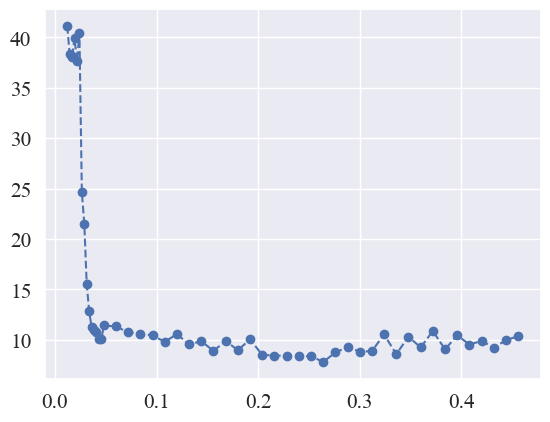

In [8]:
# df_best.sort_values(by='angular_pixel_size_input_image', inplace=True)
x = df_best.index * 240
y = df_best.MAE
plt.plot(x, y, 'o--')
plt.show()

In [9]:
def error_bar(x):
    if x < 15:
        return np.random.uniform(0.1, 1.5)
    elif x < 30:
        return np.random.uniform(1.5, 3)
    else:
        return np.random.uniform(1, 2)
       

C:\Users\FYQ\AppData\Local\Temp\ipykernel_19200\698673038.py:56: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


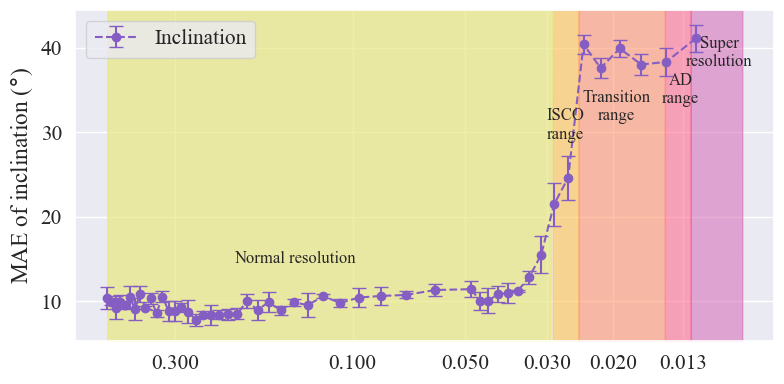

In [10]:
# x0 = 4.6e-5 * 3072 # upper bound
# x1 = 7.1e-5 * 3072 # lower bound
# x2 = 10.1e-5 * 3072 # ISCO
plt.rcParams['font.size'] = 12
np.random.seed(2024)
upper = 5.16e-5 * 240 # upper bound
lower = 6.05e-5 * 240 # lower bound
ISCO_upper = 1.032e-4 * 240 # ISCO upper bound
ISCO_lower = 1.21e-4 * 240 # ISCO lower bound
error = list(map(error_bar, y))
fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=True)
ax.errorbar(x, y, error, fmt='o--', capsize=5, color='#845EC2', label='Inclination')
# ax.grid()

points_num = 1000
el = Ellipse((2, -1), 0.5, 0.5)
xf = np.linspace(upper, lower, points_num)
y_upper = ax.get_ylim()[1]
y_lower = ax.get_ylim()[0]
yf1 = [y_upper+0.2]*points_num
yf0 = [y_lower-0.1]*points_num
# BH size range
ax.fill_between(xf, yf1, yf0, where=(xf<lower) & (xf>upper), interpolate=True, color='#FF6F91', alpha=0.6) # 
# ISCO range
xf = np.linspace(ISCO_upper, ISCO_lower, points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<ISCO_lower) & (xf>ISCO_upper), interpolate=True, color='#FFC75F', alpha=0.65)
# transition range
xf = np.linspace(lower, ISCO_upper, points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<ISCO_upper) & (xf>lower), interpolate=True, color='#FF9671', alpha=0.6)
# normal resolution
xf = np.linspace(ISCO_lower, x.max(), points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<x.max()) & (xf>ISCO_lower), interpolate=True, color='#E9E881', alpha=0.7)
# super resolution
xf = np.linspace(x.min()*0.75, upper, points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<upper) & (xf>x.min()*0.75), interpolate=True, color='#D65DB1', alpha=0.5)

ax.set_ylim([y_lower, y_upper])
ax.invert_xaxis()
height = 32
ax.annotate('Normal resolution', xy=(ISCO_lower, y_upper), xytext=((ISCO_lower + x.max()) / 2 - 0.1, 15),
            horizontalalignment='center', verticalalignment='center')
ax.annotate('ISCO\nrange', xy=(ISCO_upper, y_upper), xytext=((ISCO_upper + ISCO_lower) / 2, height - 1.2),
            horizontalalignment='center', verticalalignment='center')
ax.annotate('Transition\nrange', xy=(lower, y_upper), xytext=((lower + ISCO_upper) / 2, height + 1),
            horizontalalignment='center', verticalalignment='center')
ax.annotate('AD\nrange', xy=(upper, y_upper), xytext=((upper + lower) / 2 - 3e-4, height + 1),
            horizontalalignment='center', verticalalignment='bottom')
ax.annotate('Super\nresolution', xy=(ISCO_lower, y_upper), xytext=((x.min() + upper) / 2 - 1.8e-3, y_upper-5.1),
            horizontalalignment='center', verticalalignment='center')
# ax.set_xlabel('Angular size of the whole image (arcsec)')
ax.set_ylabel('MAE of inclination ($\degree$)')
ax.set_xscale('log')
ax.set_xticks([0.3, 0.1, 0.05, 0.03, 0.02, 0.013])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend()
fig.tight_layout()

plt.savefig(f'images/size_vs_angular_inc.png', dpi=600)
plt.savefig(f'images/size_vs_angular_inc.pdf')
plt.show()